In [180]:
#Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import time


In [181]:
#Extracting data set and getting initial information 

water_qua = pd.read_csv('waterQuality1.csv')

df = water_qua.copy()

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.01,0.35,0.83,0.17,0.05,0.20,...,0.05,16.08,1.13,0.01,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.00,5.28,0.68,0.66,0.90,0.65,...,0.10,2.01,1.93,0.00,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.01,4.24,0.53,0.02,0.99,0.05,...,0.08,14.16,1.11,0.01,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.00,7.23,0.03,1.66,1.08,0.71,...,0.02,1.41,1.29,0.00,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.01,2.67,0.69,0.57,0.61,0.13,...,0.12,6.74,1.11,0.00,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.00,0.80,0.43,1.38,0.11,0.67,...,0.14,9.75,1.89,0.01,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.6,0.01,1.35,0.00,1.28,0.62,1.88,0.33,0.13,...,0.02,18.60,1.78,0.01,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.00,6.22,0.10,1.86,0.86,0.16,...,0.20,13.65,1.81,0.00,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.01,3.14,0.77,1.45,0.98,0.35,...,0.17,14.66,1.84,0.00,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.01,6.40,0.49,0.82,1.24,0.83,...,0.11,4.79,1.46,0.01,30.42,0.08,0.03,0.31,0.01,1


In [182]:
#Removing '#NUM!' value from both ammonia and is_safe columns as make them incorrect data type

df = df[df['ammonia'] != '#NUM!']
df = df[df['is_safe'] != '#NUM!']

# Converting ammonia column into float and is_safe column into integer

df['ammonia'] = df['ammonia'].astype(float)
df['is_safe'] = df['is_safe'].astype(int)

#Checking null values

df.isna().sum() #no null values

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [183]:
#Computing summary statistics

statistics = df.describe()
statistics = statistics.T

statistics



,count,mean,std,min,25%,50%,75%,max
aluminium,7996.00,0.67,1.27,0.00,0.04,0.07,0.28,5.05
ammonia,7996.00,14.28,8.88,-0.08,6.58,14.13,22.13,29.84
arsenic,7996.00,0.16,0.25,0.00,0.03,0.05,0.10,1.05
barium,7996.00,1.57,1.22,0.00,0.56,1.19,2.48,4.94
cadmium,7996.00,0.04,0.04,0.00,0.01,0.04,0.07,0.13
chloramine,7996.00,2.18,2.57,0.00,0.10,0.53,4.24,8.68
chromium,7996.00,0.25,0.27,0.00,0.05,0.09,0.44,0.90
copper,7996.00,0.81,0.65,0.00,0.09,0.75,1.39,2.00
flouride,7996.00,0.77,0.44,0.00,0.41,0.77,1.16,1.50
bacteria,7996.00,0.32,0.33,0.00,0.00,0.22,0.61,1.00


Text(0, 0.5, '')

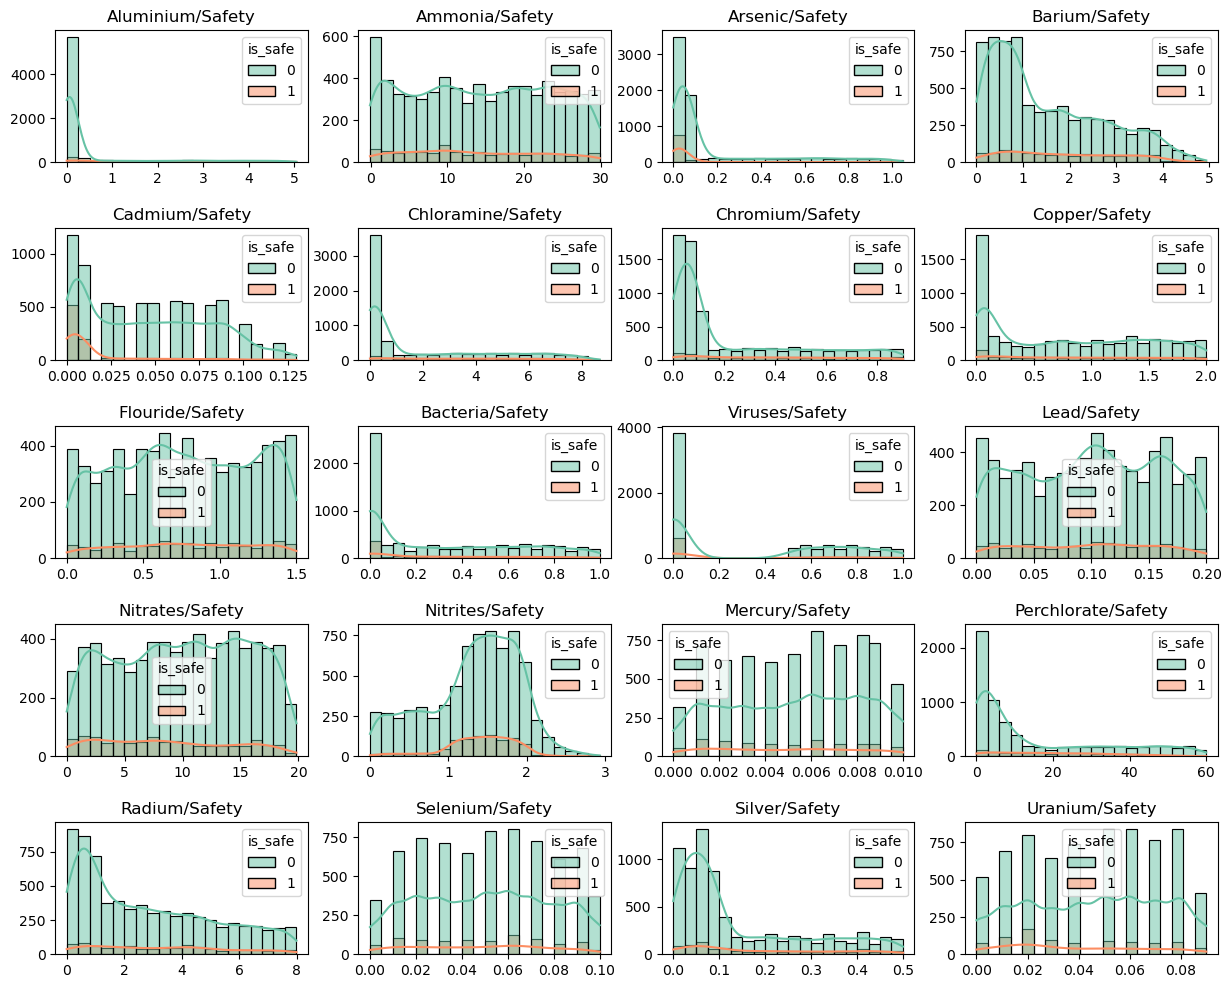

In [184]:
#Initial distribution of features reflected in the target variable

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5, wspace=0.2)

cus_palette = "Set2"

sns.histplot(data=df, x='aluminium', hue='is_safe', kde=True, bins=20, ax=axes[0, 0], palette=cus_palette)
axes[0, 0].set_title('Aluminium/Safety')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

sns.histplot(data=df, x='ammonia', hue='is_safe', kde=True, bins=20, ax=axes[0, 1], palette=cus_palette)
axes[0, 1].set_title('Ammonia/Safety')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

sns.histplot(data=df, x='arsenic', hue='is_safe', kde=True, bins=20, ax=axes[0, 2], palette=cus_palette)
axes[0, 2].set_title('Arsenic/Safety')
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')

sns.histplot(data=df, x='barium', hue='is_safe', kde=True, bins=20, ax=axes[0, 3], palette=cus_palette)
axes[0, 3].set_title('Barium/Safety')
axes[0, 3].set_xlabel('')
axes[0, 3].set_ylabel('')

sns.histplot(data=df, x='cadmium', hue='is_safe', kde=True, bins=20, ax=axes[1, 0], palette=cus_palette)
axes[1, 0].set_title('Cadmium/Safety')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

sns.histplot(data=df, x='chloramine', hue='is_safe', kde=True, bins=20, ax=axes[1, 1], palette=cus_palette)
axes[1, 1].set_title('Chloramine/Safety')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

sns.histplot(data=df, x='chromium', hue='is_safe', kde=True, bins=20, ax=axes[1, 2], palette=cus_palette)
axes[1, 2].set_title('Chromium/Safety')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')

sns.histplot(data=df, x='copper', hue='is_safe', kde=True, bins=20, ax=axes[1, 3], palette=cus_palette)
axes[1, 3].set_title('Copper/Safety')
axes[1, 3].set_xlabel('')
axes[1, 3].set_ylabel('')

sns.histplot(data=df, x='flouride', hue='is_safe', kde=True, bins=20, ax=axes[2, 0], palette=cus_palette)
axes[2, 0].set_title('Flouride/Safety')
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylabel('')

sns.histplot(data=df, x='bacteria', hue='is_safe', kde=True, bins=20, ax=axes[2, 1], palette=cus_palette)
axes[2, 1].set_title('Bacteria/Safety')
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylabel('')

sns.histplot(data=df, x='viruses', hue='is_safe', kde=True, bins=20, ax=axes[2, 2], palette=cus_palette)
axes[2, 2].set_title('Viruses/Safety')
axes[2, 2].set_xlabel('')
axes[2, 2].set_ylabel('')

sns.histplot(data=df, x='lead', hue='is_safe', kde=True, bins=20, ax=axes[2, 3], palette=cus_palette)
axes[2, 3].set_title('Lead/Safety')
axes[2, 3].set_xlabel('')
axes[2, 3].set_ylabel('')

sns.histplot(data=df, x='nitrates', hue='is_safe', kde=True, bins=20, ax=axes[3, 0], palette=cus_palette)
axes[3, 0].set_title('Nitrates/Safety')
axes[3, 0].set_xlabel('')
axes[3, 0].set_ylabel('')

sns.histplot(data=df, x='nitrites', hue='is_safe', kde=True, bins=20, ax=axes[3, 1], palette=cus_palette)
axes[3, 1].set_title('Nitrites/Safety')
axes[3, 1].set_xlabel('')
axes[3, 1].set_ylabel('')

sns.histplot(data=df, x='mercury', hue='is_safe', kde=True, bins=20, ax=axes[3, 2], palette=cus_palette)
axes[3, 2].set_title('Mercury/Safety')
axes[3, 2].set_xlabel('')
axes[3, 2].set_ylabel('')

sns.histplot(data=df, x='perchlorate', hue='is_safe', kde=True, bins=20, ax=axes[3, 3], palette=cus_palette)
axes[3, 3].set_title('Perchlorate/Safety')
axes[3, 3].set_xlabel('')
axes[3, 3].set_ylabel('')

sns.histplot(data=df, x='radium', hue='is_safe', kde=True, bins=20, ax=axes[4, 0], palette=cus_palette)
axes[4, 0].set_title('Radium/Safety')
axes[4, 0].set_xlabel('')
axes[4, 0].set_ylabel('')

sns.histplot(data=df, x='selenium', hue='is_safe', kde=True, bins=20, ax=axes[4, 1], palette=cus_palette)
axes[4, 1].set_title('Selenium/Safety')
axes[4, 1].set_xlabel('')
axes[4, 1].set_ylabel('')

sns.histplot(data=df, x='silver', hue='is_safe', kde=True, bins=20, ax=axes[4, 2], palette=cus_palette)
axes[4, 2].set_title('Silver/Safety')
axes[4, 2].set_xlabel('')
axes[4, 2].set_ylabel('')

sns.histplot(data=df, x='uranium', hue='is_safe', kde=True, bins=20, ax=axes[4, 3], palette=cus_palette)
axes[4, 3].set_title('Uranium/Safety')
axes[4, 3].set_xlabel('')
axes[4, 3].set_ylabel('')

In [185]:
#Defining features and the target variable

features = df.iloc[:, :-1]
target = df.iloc[:, -1]


In [186]:
#Applying normalization since the values are not between 0 and 1

scaler_selection = StandardScaler()
features_scaled = scaler_selection.fit_transform(features)
print('After first normalization:\n\n',features_scaled)

print('')

#Since the values are still not between 0 and 1 futher normalization was applied which is Min-Max Scaling 

scaler_selection_second = MinMaxScaler()
features_scaled_twice = scaler_selection_second.fit_transform(features_scaled)
print('After second normalization:\n\n',features_scaled_twice)


After first normalization:

 [[ 0.77740287 -0.58549134 -0.48087476 ...  1.05369443  1.33873624
  -0.91704015]
 [ 1.30694501  0.77511802 -0.59963176 ...  1.05369443  0.85113427
   0.19802266]
 [ 0.27157158 -0.02908321 -0.48087476 ...  0.70612871  2.03531047
  -1.28872776]
 ...
 [-0.45556091 -0.83666343 -0.63921743 ... -1.72683135 -0.75098648
   0.19802266]
 [-0.51878982 -0.48186877 -0.59963176 ... -1.72683135 -1.02961617
  -1.66041536]
 [-0.49507898 -0.83666343 -0.59963176 ... -1.72683135 -0.75098648
   0.19802266]]

After second normalization:

 [[0.32673267 0.30614973 0.03809524 ... 0.8        0.68       0.22222222]
 [0.45940594 0.70989305 0.00952381 ... 0.8        0.54       0.55555556]
 [0.2        0.47125668 0.03809524 ... 0.7        0.88       0.11111111]
 ...
 [0.01782178 0.23161765 0.         ... 0.         0.08       0.55555556]
 [0.0019802  0.3368984  0.00952381 ... 0.         0.         0.        ]
 [0.00792079 0.23161765 0.00952381 ... 0.         0.08       0.55555556]]


In [187]:
#Checking for class imbalance

class_imbalance_check = pd.Series(target).value_counts()
print('Before SMOTE:\n\n', class_imbalance_check)

print('')

#Since there is a significant imbalance, SMOTE was applied

smote = SMOTE(random_state=42)

X_smoted, y_smoted = smote.fit_resample(features_scaled_twice, target)

class_balance_smoted = pd.Series(y_smoted).value_counts()
print('After SMOTE:\n\n', class_balance_smoted)


Before SMOTE:

 0    7084
1     912
Name: is_safe, dtype: int64

After SMOTE:

 1    7084
0    7084
Name: is_safe, dtype: int64


Text(0, 0.5, 'Frequency')

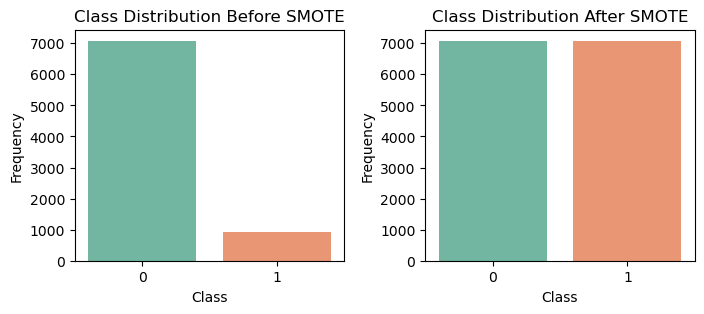

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
plt.subplots_adjust(hspace=0.3, wspace=0.3)

cus_palette = "Set2"

sns.barplot(x=class_imbalance_check.index, y=class_imbalance_check.values, palette=cus_palette, ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Frequency')

sns.barplot(x=class_balance_smoted.index, y=class_balance_smoted.values, palette=cus_palette, ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Frequency')


In [189]:
#Defining X and y for training

X = X_smoted
y = y_smoted

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [190]:
# Define the SVM model


total_time = [] #collect total training time


C_par = [0.1, 1, 10]
kernel_par = ['linear', 'rbf', 'poly']
gammas_par = ['scale', 'auto']
degree_par = [2, 3, 4]

#Initializing variables to collect 

best_model = None
best_val_accuracy = 0.0
best_hyperparameters = None


for C in C_par:
    for kernel in kernel_par:
        for gamma in gammas_par:
            for degree in degree_par:
                print("Hyperparameters:", "C =", C, "Kernel =", kernel, "Gamma =", gamma, "Degree =", degree)
                
                start_time = time.time() #starting traning time
                   
                #Defining model and start training
                svm = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree)
                svm.fit(X_train, y_train)

                # Evaluaton validation set
                val_accuracy = accuracy_score(y_val, svm.predict(X_val))
                print("Validation Accuracy:", val_accuracy)
                
                if val_accuracy > best_val_accuracy:
                    best_val_accuracy = val_accuracy
                    best_model = svm_model
                    best_hyperparameters = {"C": C, "Kernel": kernel, "Gamma": gamma, "Degree": degree}
                    
                end_time = time.time()
                training_time = end_time - start_time
                total_time.append(training_time)

print("Best Hyperparameters selected:", best_hyperparameters)
                


Hyperparameters: C = 0.1 Kernel = linear Gamma = scale Degree = 2
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = linear Gamma = scale Degree = 3
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = linear Gamma = scale Degree = 4
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = linear Gamma = auto Degree = 2
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = linear Gamma = auto Degree = 3
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = linear Gamma = auto Degree = 4
Validation Accuracy: 0.796206440229378
Hyperparameters: C = 0.1 Kernel = rbf Gamma = scale Degree = 2
Validation Accuracy: 0.9025143361270401
Hyperparameters: C = 0.1 Kernel = rbf Gamma = scale Degree = 3
Validation Accuracy: 0.9025143361270401
Hyperparameters: C = 0.1 Kernel = rbf Gamma = scale Degree = 4
Validation Accuracy: 0.9025143361270401
Hyperparameters: C = 0.1 Kernel = rbf Gamma = auto Degree = 2
Va

In [198]:
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8292166549047283


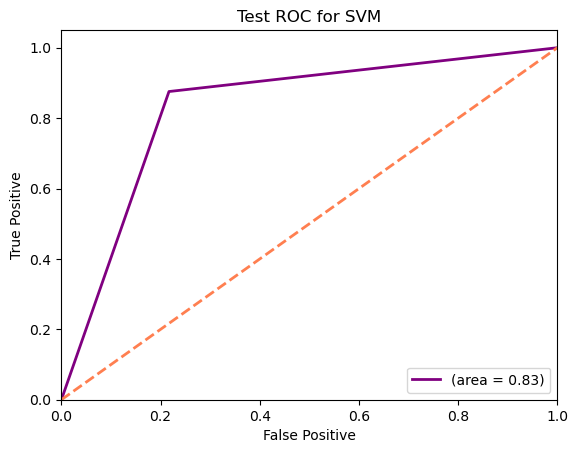

In [197]:

#Extracting predictions and true labels to use plotting ROC curve

y_train_predicted = svm.predict(X_train)
y_test_predicted = svm.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_test_predicted)
roc_auc = auc(fpr, tpr)

#Plotting ROC

plt.figure()
plt.plot(fpr, tpr, color='purple', lw=2, label='(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='coral', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Test ROC for SVM')
plt.legend(loc="lower right")
plt.show()

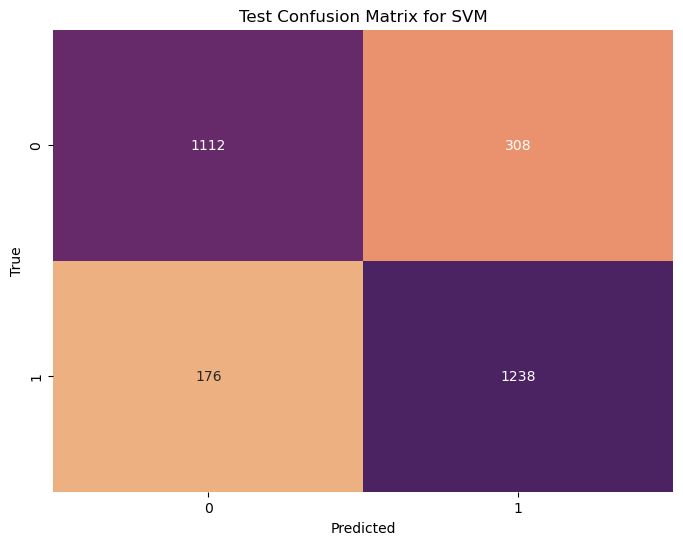

In [193]:
#Plotting Confusion Matrix

cm_test = confusion_matrix(y_test, y_test_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='flare', cbar=False)
plt.title('Test Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

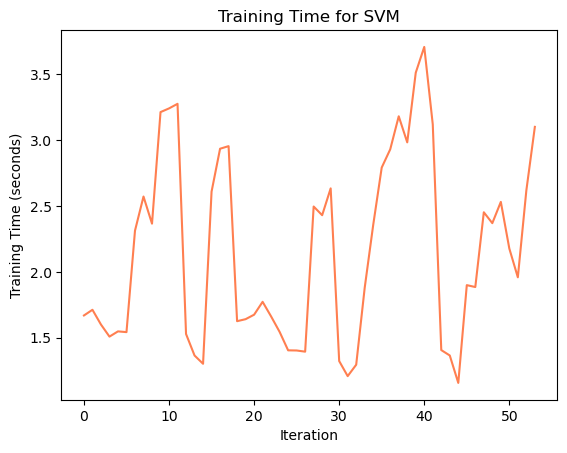

In [194]:
#Plotting Training Time

plt.figure()
plt.plot(range(len(total_time)), total_time, color='coral')
plt.xlabel('Iteration')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time for SVM')
plt.show()